In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
insurance_df = pd.read_csv(r"C:\Users\Antho\Downloads\insurance - insurance.csv")
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
insurance_df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [3]:
insurance_df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [4]:
insurance_df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [5]:
def outlier_test(column_name):
    zscores = stats.zscore(column_name)
    outliers = abs(zscores) > 3
    return (np.sum(outliers))

In [6]:
def normality_test(column_name):
    normality = stats.normaltest(column_name)
    return normality

In [7]:
def equal_variance_test(column_name_a, column_name_b):
    variance = stats.levene(column_name_a, column_name_b)
    return variance

# Do smokers have a higher insurance charge than non-smokers?

###  
Null Hypothesis: There is no difference in insurance charge for non-smokers to smokers.

Alternate Hypothesis: There is a difference in insurance charge for non-smokers to smokers.

### 
The test I will perform based on the data type and number of samples is an independent two sample t-test because there are different participants in each group.

In [8]:
smokers = insurance_df.loc[insurance_df["smoker"] == "yes", "charges"]
non_smokers = insurance_df.loc[insurance_df["smoker"] == "no", "charges"]
print(outlier_test(smokers))
print(outlier_test(non_smokers))

0
24


In [9]:
non_smokers = non_smokers[(np.abs(stats.zscore(non_smokers)) < 3)]

In [10]:
print(normality_test(smokers))
print(normality_test(non_smokers))

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)
NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)


In [11]:
variance = stats.levene(smokers, non_smokers)
variance

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

In [12]:
result1 = stats.ttest_ind(smokers, non_smokers, equal_var = False)
result1

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

### 
Our p-value is less than .05, so we reject the null hypothesis and accept there is a significant difference in insurance charge for smokers to non-smokers.

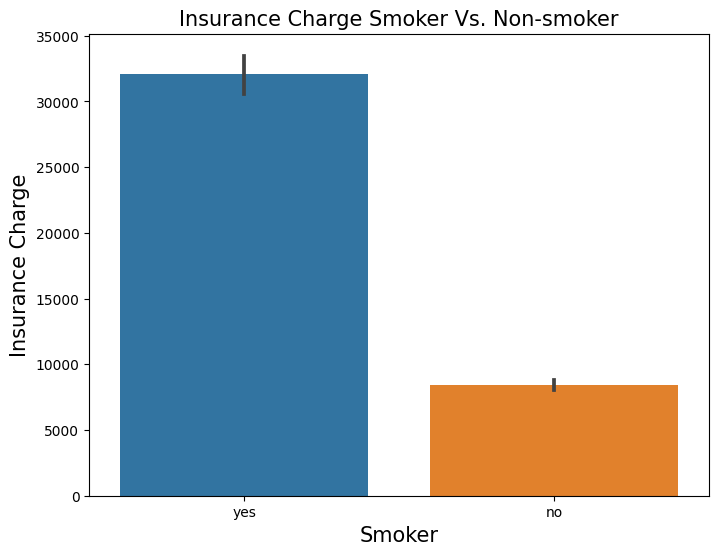

In [13]:
fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(data = insurance_df, x = "smoker", y = "charges")
plt.title("Insurance Charge Smoker Vs. Non-smoker", fontsize = 15)
plt.xlabel("Smoker", fontsize = 15)
plt.ylabel("Insurance Charge", fontsize = 15)
plt.show()

# Are men more likely to smoke than women?

### 
Null Hypothesis: Men are not more likely to smoke than women.

Alternate Hypothesis: Men are more likely to smoke than women.

### 
The test I will perform based on the data type and number of samples is a chi-squared categorical test because it tests group membership.

In [14]:
table = pd.crosstab(insurance_df["sex"], insurance_df["smoker"])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [15]:
result2 = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result2

In [16]:
print(p)
p < .05

0.006548143503580696


True

### 
Our p-value is less than .05, so we reject the null hypothesis and accept there is a relationship between sex and likelyhood to smoke.

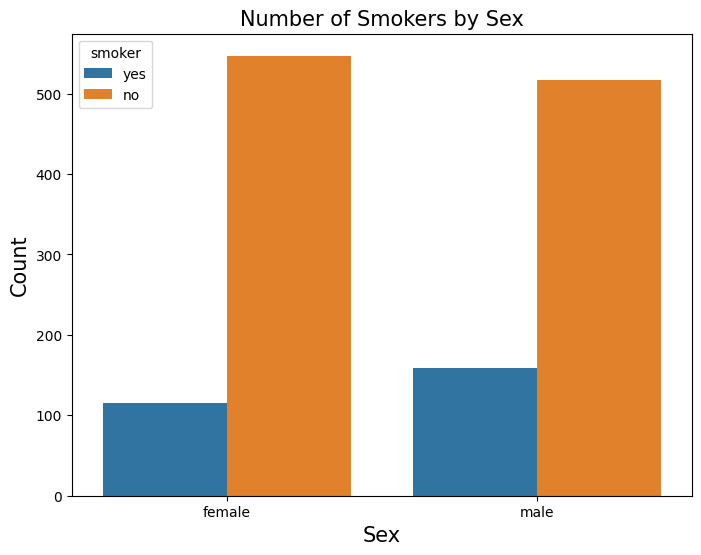

In [17]:
fig, ax = plt.subplots(figsize = (8,6))
sns.countplot(data = insurance_df, x = "sex", hue = "smoker")
plt.title("Number of Smokers by Sex", fontsize = 15)
plt.xlabel("Sex", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

# Do different regions have different charge on average?

### 
Null Hypothesis: There is no difference in average insurance charge based on region.

Alternate Hypothesis: There is a difference in average insurance charge based on region.

### 
The test I will perform based on the data type and number of samples is ANOVA because there are more than two regions/groups.

In [18]:
groups = {}
for i in insurance_df["region"].unique():
    data = insurance_df.loc[insurance_df["region"] == i, "charges"].copy()
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [19]:
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    norm_results[i] = {"n" : len(data), "p" : p, "test_stat" : stat,}
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test_stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [20]:
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test_stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


In [21]:
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

In [22]:
result3 = stats.kruskal(*groups.values())
result3

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)

###  
Our p-value is greater than .5, so we fail to reject the null hypothesis accepting there is no significant difference in average insurance charge based on region.  

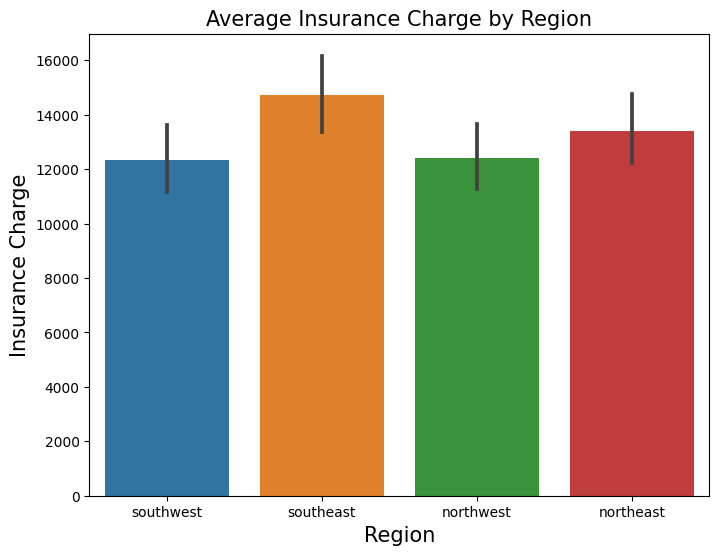

In [23]:
fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(data = insurance_df, x = "region", y = "charges")
plt.title("Average Insurance Charge by Region", fontsize = 15)
plt.xlabel("Region", fontsize = 15)
plt.ylabel("Insurance Charge", fontsize = 15)
plt.show()